Problem 2: Question 3


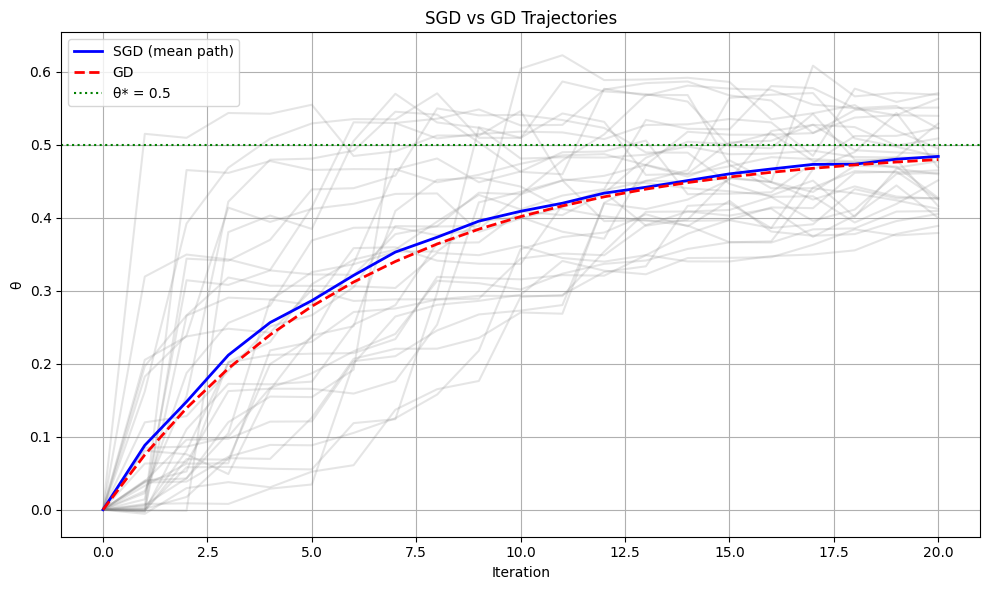

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
np.random.seed(42)
theta_star = 0.5
sigma_x = 0.5  # sqrt(1/4)
sigma = 0.1
n = 10000
alpha = 0.3 #learning rate
steps = 20
epochs = 200

# Generate data
x = np.random.normal(0, sigma_x, n) # x ∼ N (0, (Σ_x)^1/2)
epsilon = np.random.normal(0, sigma, n) # ϵ ∼ N(0, σ)
y = theta_star * x + epsilon #y = θ^∗x + ϵ
 
# Compute true gradient function
def full_gradient(theta, x, y):
    grad = 2 * x * (theta * x - y)
    return np.mean(grad)

# SGD simulation (batch size = 1)
sgd_paths = []
for _ in range(epochs):
    theta = 0.0
    path = [theta]
    for _ in range(steps):
        i = np.random.randint(0, n)
        xi, yi = x[i], y[i]
        grad = 2 * xi * (theta * xi - yi)
        theta -= alpha * grad
        path.append(theta)
    sgd_paths.append(path)

# GD simulation (same initial point, deterministic)
theta = 0.0
gd_path = [theta]
for _ in range(steps):
    grad = full_gradient(theta, x, y)
    theta -= alpha * grad
    gd_path.append(theta)

# Convert results
sgd_paths = np.array(sgd_paths)
mean_path = np.mean(sgd_paths, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(min(30, epochs)):
    plt.plot(sgd_paths[i], color='gray', alpha=0.2)
plt.plot(mean_path, label='SGD (mean path)', color='blue', linewidth=2)
plt.plot(gd_path, label='GD', color='red', linestyle='--', linewidth=2)
plt.axhline(theta_star, color='green', linestyle=':', label='θ* = 0.5')
plt.xlabel('Iteration')
plt.ylabel('θ')
plt.title('SGD vs GD Trajectories')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


SGD shows noisy, random paths indicated by the gray plots but on average converges towards $\theta ^*$. This indicates that SGD suffers from high variance despite being less computationally expensive.

In comparison, GD is smoother and more deterministic. However, since we are doing 200 iterations over 10,000 datapoints, the GD is more computationally expensive.